Du doan doanh thu xe hoi 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('elantra.csv')
df.tail(15)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
35,9,2011,14386,9.0,357,249.732,226.674
36,9,2012,18305,7.8,374,254.333,231.086
37,9,2013,19691,7.2,298,245.566,233.743
38,10,2010,9497,9.5,178,216.655,219.024
39,10,2011,13000,8.8,370,246.971,226.761
40,10,2012,14512,7.8,257,256.389,231.652
41,10,2013,14876,7.2,223,243.374,233.782
42,11,2010,8631,9.8,161,219.303,219.544
43,11,2011,12414,8.6,255,247.092,227.136
44,11,2012,15923,7.8,246,248.136,231.190


In [10]:
## Xap xep du lieu theo thu tu cac hang du lieu theo thang, nam:
## Dung df.sort_values va df.reset_index

df = df.sort_values(by = ['Year', 'Month'])



In [11]:
df.reset_index()

,index,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,0,1,2010,7690,9.7,153,213.377,217.466
1,5,2,2010,7966,9.8,130,209.924,217.251
2,10,3,2010,8225,9.9,138,209.163,217.305
3,14,4,2010,9657,9.9,132,209.024,217.376
4,18,5,2010,9781,9.6,177,206.172,217.299
5,22,6,2010,14245,9.4,138,204.161,217.285
6,26,7,2010,18215,9.5,156,206.834,217.677
7,30,8,2010,15181,9.5,202,208.927,218.012
8,34,9,2010,10062,9.5,150,209.850,218.281
9,38,10,2010,9497,9.5,178,216.655,219.024


In [12]:
import matplotlib.pyplot as plt



Ve bieu do de truc quan hoa du lieu 

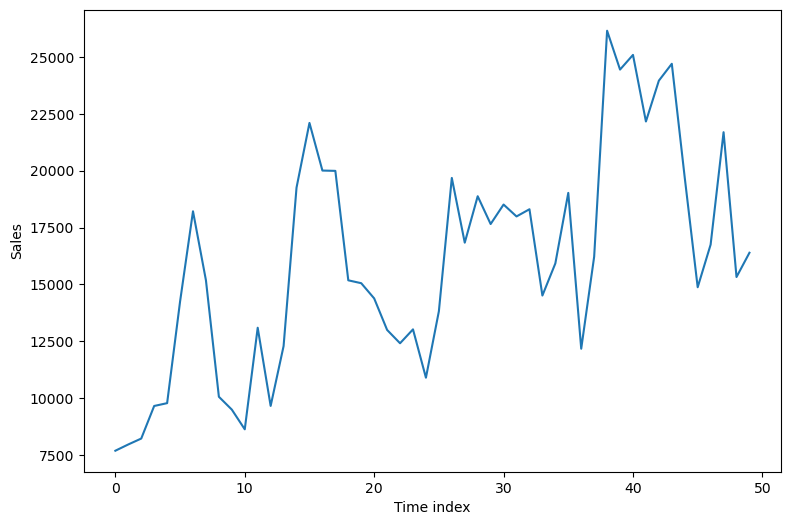

In [13]:
plt.figure(figsize = (9,6))

plt.plot(df.ElantraSales.values)

plt.xlabel('Time index')

plt.ylabel('Sales')

plt.show()

Bo cot ElantraSales, Month Year

In [15]:
nf = df.columns.drop(["ElantraSales", "Month", "Year"])
nf

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

Chia tap du lieu:
Train: Nam < 2013
Test: Nam > 2013

In [16]:
df_train = df[df.Year < 2013]
df_test = df[df.Year > 2013]

y_train = df_train.ElantraSales.values
y_test = df_test.ElantraSales.values


Chuan hoa du lieu bang Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[nf])

X_train = scaler.transform(df_train[nf])
X_test = scaler.transform(df_test[nf])

Xay dung mo hinh

In [19]:
import sklearn



In [23]:
from sklearn.linear_model import LinearRegression


In [21]:
our_model = LinearRegression()


our_model.fit(X_train, y_train)

LinearRegression()

In [24]:
pred = our_model.predict(X_test)

pred

array([18419.26509553, 18137.6000718 ])

4. Danh gia mo hinh

In [33]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    errors = np.abs(y_pred - y_true).astype(float)/y_true
    return np.mean(errors)*100



In [34]:
y_pred_test = our_model.predict(X_test)

print('RSME: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("Mean relative error: {:.1f}%".format(relative_error(y_test, y_pred_test)))


RSME: 2511.17
Mean relative error: 15.4%


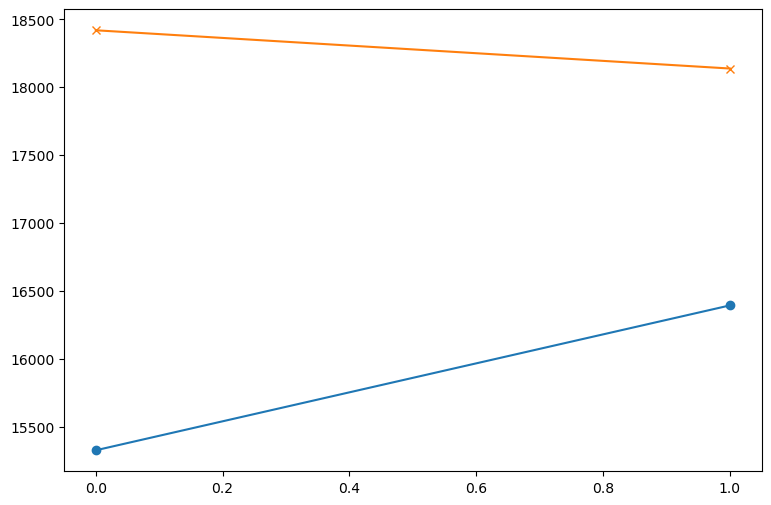

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.plot(y_test, label = 'Actual', marker = 'o')
plt.plot(y_pred_test, label = "Prediction", marker = 'x')

plt.show()

RSME qua lon, va sai so qua cao, dan toi phuong phap nay khong hieu qua
Phuong phap phan tich du lieu theo tung nam bi fail

5. Phuong phap cai tien

In [35]:
## Tap du lieu theo dac trung Month

month_train = pd.get_dummies(df_train.Month)
month_train.head()


,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,False,False
14,False,False,False,True,False,False,False,False,False,False,False,False
18,False,False,False,False,True,False,False,False,False,False,False,False


Ghep dac trung

In [50]:
pd.get_dummies(df_train.Month)

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,False,False
14,False,False,False,True,False,False,False,False,False,False,False,False
18,False,False,False,False,True,False,False,False,False,False,False,False
22,False,False,False,False,False,True,False,False,False,False,False,False
26,False,False,False,False,False,False,True,False,False,False,False,False
30,False,False,False,False,False,False,False,True,False,False,False,False
34,False,False,False,False,False,False,False,False,True,False,False,False
38,False,False,False,False,False,False,False,False,False,True,False,False


In [65]:
X_train = np.hstack((X_train, pd.get_dummies(df_train.Month)))
X_test = np.hstack((X_test, pd.get_dummies(df_test.Month)))

In [66]:
our_model.fit(X_train, y_train)

LinearRegression()

In [67]:

y_pred_test = our_model.predict(X_test)
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred_test)))

ValueError: X has 10 features, but LinearRegression is expecting 52 features as input.